In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report


In [2]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets first check for missing **values**

<Axes: >

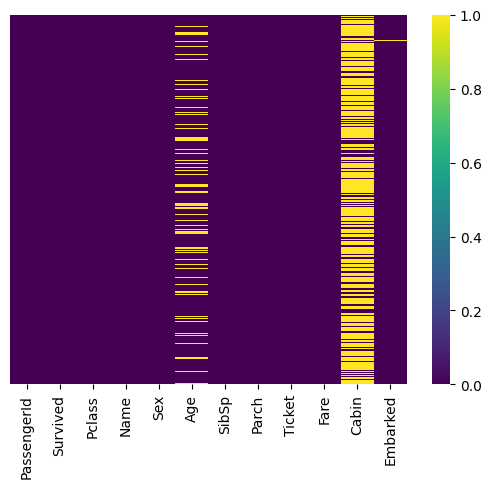

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

What we observe is we have a lot of missing values in Age and Cabin column and 1 in Embarked column

In [4]:
df.drop(['Cabin','Ticket','PassengerId'],axis=1,inplace=True)

In [5]:
df = df.dropna(subset="Embarked",axis=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [6]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## **Filling the missing values**


> We can take average w.r.t to any of the factors but we'll selelect PClass because its divided into 3 categories so we'll get a more accurate answer




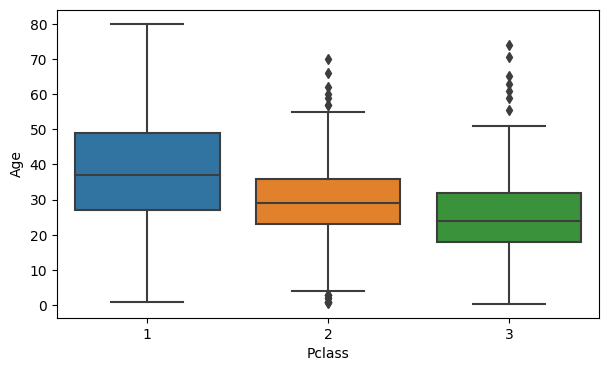

In [8]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

In [9]:
def impute_age(df):
  Age = df['Age']
  Pclass = df['Pclass']

  if pd.isnull(Age):

      if Pclass==1:
        return 37

      elif Pclass==2:
        return 29

      else:
        return 24
  else:
    return Age

In [10]:
df['Age'] = df.apply(impute_age,axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## **Visualizing the Data**

Cabin, Passenger ID and Ticket is not a very Important information for calculating he probability of suurvived or not survived so we can just drop that

Now we have to fill the missing values in age

<Axes: xlabel='Survived', ylabel='count'>

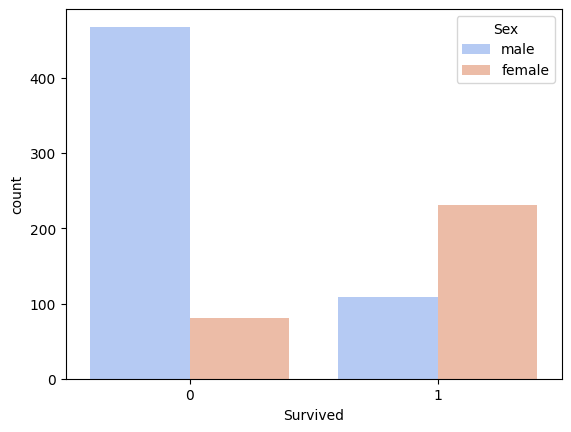

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='coolwarm')

<Axes: xlabel='Survived', ylabel='count'>

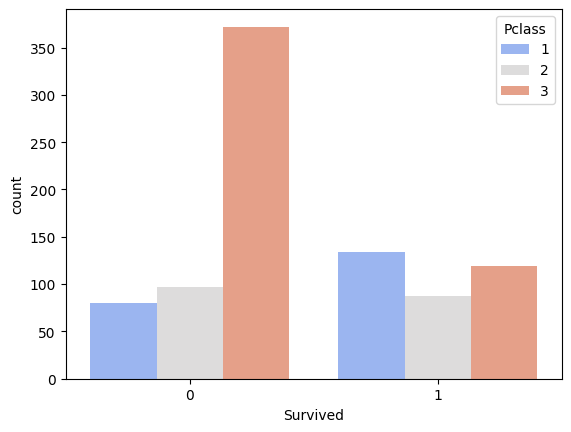

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='coolwarm')

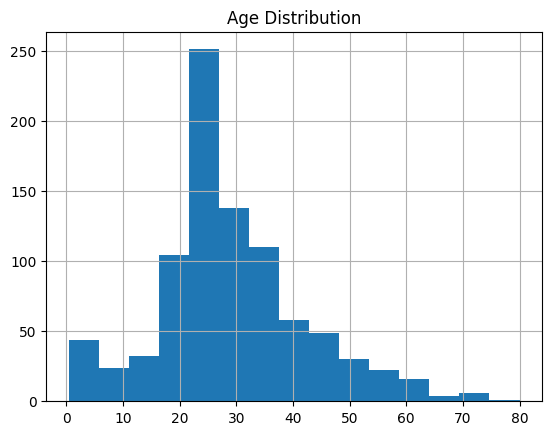

In [13]:
df['Age'].hist(bins=15)
plt.title('Age Distribution');

<Axes: xlabel='Sex', ylabel='Age'>

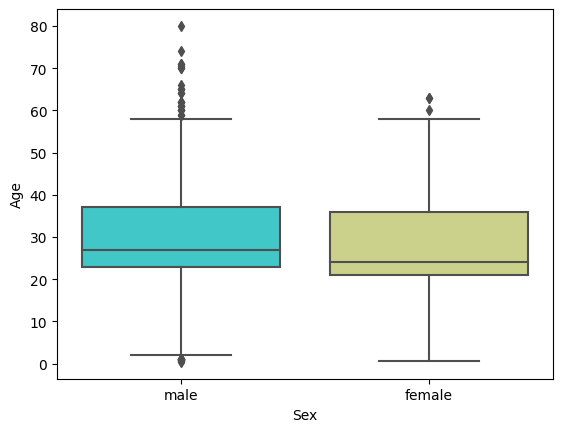

In [14]:
sns.boxplot(y='Age',x='Sex',data=df,palette='rainbow')


**No. of people who survived in the ship w.r.t their Fare**

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


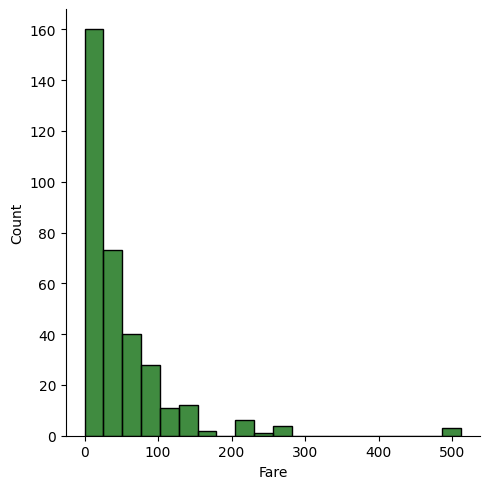

In [15]:
survived_fares = df[df['Survived'] == 1]['Fare'].dropna()
g = sns.displot(survived_fares, kde=False, color='darkgreen', bins=20)


Now group by

In [16]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


**Question : How many men died on the ship who were in Pclass-3**

In [17]:
df[(df['Sex']=='male') & (df['Pclass'] == 3) & (df['Survived'] == 0)]['Name'].count()

300

In [18]:
df['Sex'].info()

<class 'pandas.core.series.Series'>
Index: 889 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 13.9+ KB


#**Feature Engineering**

In [19]:
df2=df

We create a new Coloumn to stor the total size of people in one family

In [20]:
df2['familySize'] = df2['SibSp'] + df['Parch'] + 1

In [21]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoded_columns = pd.get_dummies(df2['Embarked'], columns=['Embarked'])
df2 = pd.concat([df2, encoded_columns], axis=1)
df2.drop(columns='Embarked', inplace=True)


In [23]:
encoded_columns1 = pd.get_dummies(df2['Sex'], columns=['Sex'])
df2 = pd.concat([df2, encoded_columns1], axis=1)
df2.drop(columns='Sex', inplace=True)

In [24]:
# Lets drop the columns we don't need for our ML Model
df2 = df2.drop(['SibSp', 'Parch','Name','female'], axis = 1)

In [25]:
df2.head()

,Survived,Pclass,Age,Fare,familySize,C,Q,S,male
0,0,3,22.0,7.2500,2,False,False,True,True
1,1,1,38.0,71.2833,2,True,False,False,False
2,1,3,26.0,7.9250,1,False,False,True,False
3,1,1,35.0,53.1000,2,False,False,True,False
4,0,3,35.0,8.0500,1,False,False,True,True


In [26]:
df2.dropna(subset=['S','Q','C'],axis=0)

,Survived,Pclass,Age,Fare,familySize,C,Q,S,male
0,0,3,22.0,7.2500,2,False,False,True,True
1,1,1,38.0,71.2833,2,True,False,False,False
2,1,3,26.0,7.9250,1,False,False,True,False
3,1,1,35.0,53.1000,2,False,False,True,False
4,0,3,35.0,8.0500,1,False,False,True,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,1,False,False,True,True
887,1,1,19.0,30.0000,1,False,False,True,False
888,0,3,24.0,23.4500,4,False,False,True,False
889,1,1,26.0,30.0000,1,True,False,False,True


In [27]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
familySize    0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X = df2.drop(['Survived'],axis=1)
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Scaling the Data

> Here we can use using MinMax() or StandardScaler() because we don't need to preserve the units.
  So we can choose according to which gives us a better accuracy

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## Applying Machine Learning Models



## Logistic Regression



In [30]:

param_grid={
 'class_weight' : [None,'balanced'],
  'penalty': ['l1', 'l2', 'elasticnet', None],
  'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag'],
  'max_iter': [100,200,300]
}

In [31]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
cv=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
cv.fit(X_train_s,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #4. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.00048e-17): result may not be accurate.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization s

c:\Python311\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #4. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.00048e-17): result may not be accurate.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag']},
             scoring='accuracy')

In [32]:
y_pred=cv.predict(X_test_s)
logistic_score=accuracy_score(y_pred,y_test)
logistic_score

0.8027210884353742

In [33]:
cv.best_params_

{'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

## K Nearest neighbours

> First we'll find the best value for k through a line plot



In [34]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,60):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_s,y_train)
    y_pred = knn.predict(X_test_s)
    #y_pred=knn.score(X_test,y_test)
    error_rate.append(np.mean(y_pred!=y_test))
 

To explain what this function does is it finds the Mean of all cases where
the condition is either False Positive or True Negetive
So more the number these cases Higher will be the Error rate
So we wiil select the k value with the Least Error Rate 

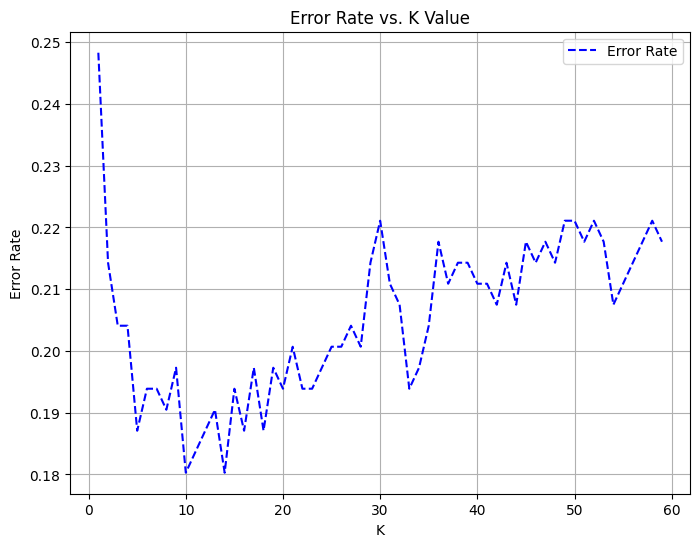

In [35]:
x_val = range(1, 60)
y_val = error_rate

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_val, y_val, color='blue', linestyle='--', label='Error Rate')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()
plt.grid()

In [36]:

model = KNeighborsClassifier(n_neighbors=10)
param_grid={'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
            }

cv=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
cv.fit(X_train_s, y_train)
y_pred = cv.predict(X_test_s)

knn_score=accuracy_score(y_pred,y_test)
knn_score

0.8197278911564626



 ## Decision Trees and Random Forests





In [37]:
param_grid={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['sqrt', 'log2']
}

In [38]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
cv=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)
y_pred=cv.predict(X_test)

In [39]:
Decsion_Tree_score=accuracy_score(y_pred,y_test)
Decsion_Tree_score

0.826530612244898

In [40]:
# Parameters that were used
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)    # We did not take 350 beacause it will overfit our Model
cv=GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)
y_pred=cv.predict(X_test)

rf_score=accuracy_score(y_pred,y_test)
rf_score

0.7857142857142857





 ### Checking how much each feature is affecting the Model





In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X, y)
feature_importances = model.feature_importances_

for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")



Pclass: 0.09994853037696945
Age: 0.2515098787040162
Fare: 0.24294866126729622
familySize: 0.07051653560393994
C: 0.011118688841607605
Q: 0.006307039064350706
S: 0.014224648841199812
male: 0.30342601730062




## Support Vector Machine



In [43]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ['scale', 'auto'] ,
              'kernel': ['rbf','sigmoid','poly','linear']}

In [44]:
from sklearn.svm import SVC

model = SVC()
cv = GridSearchCV(model,param_grid,cv=5,scoring='accuracy')
model.fit(X_train_s,y_train)

SVC()

In [45]:
y_pred = model.predict(X_test_s)
svm_score = accuracy_score(y_pred,y_test)
svm_score

0.826530612244898

### Comparing the Accuracies of every Model

In [46]:
print("Accuracy with Logistic Regression : ",logistic_score)
print("\n")
print("Accuracy with K Nearest Neighbours Classification: ",knn_score)
print("\n")
print("Accuracy with Decision Trees : ",Decsion_Tree_score)
print("\n")
print("Accuracy with Random Forests  : ",rf_score)
print("\n")
print("Accuracy with Support Vector Machines : ",svm_score)


Accuracy with Logistic Regression :  0.8027210884353742


Accuracy with K Nearest Neighbours Classification:  0.8197278911564626


Accuracy with Decision Trees :  0.826530612244898


Accuracy with Random Forests  :  0.7857142857142857


Accuracy with Support Vector Machines :  0.826530612244898


Hence, By looking at the accuracies we can conclude that Support Vector Macines has the Higest Accuracy

In [47]:
# Classification Report for Support Vector Machines
report = classification_report(y_pred,y_test)
print(report)


              precision    recall  f1-score   support

           0       0.92      0.82      0.87       205
           1       0.67      0.83      0.74        89

    accuracy                           0.83       294
   macro avg       0.80      0.83      0.81       294
weighted avg       0.84      0.83      0.83       294

